# Выбор локации для скважины

Предоставлены данные проб нефти из трех регионов с измерениями качества нефти и объем ее запасов.\
Необходимо построить модель способную помочь определить регион в котором добыча принесет большую прибыль.\
Проаналезировать риски.


## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import trange
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [2]:
geo_data_0 = pd.read_csv('/datasets/geo_data_0.csv')
geo_data_1 = pd.read_csv('/datasets/geo_data_1.csv')
geo_data_2 = pd.read_csv('/datasets/geo_data_2.csv')

datasets = [geo_data_0, geo_data_1, geo_data_2]

In [3]:
def view(data):
    print('Обзор данных', '\n')
    print(data.sample(10))
    print('\n')
    print('Информация о формате, количестве строк и пропусках', '\n')
    print(data.info())
    print('\n')
    print('Описательная статистика', '\n')
    print(data.describe())
    print('\n')
    print('Дубикаты', '\n')
    print(data.duplicated().sum())
    print('-' * 65)
    print('\n' * 3)

In [4]:
for data in datasets:
    view(data)

Обзор данных 

          id        f0        f1         f2     product
38098  x1v6F  1.253580 -0.425610   2.997920  152.238996
32680  3vYJI  1.494916 -0.304379   1.808266   62.629610
75581  5YS24  0.441655 -0.211485   5.058859   68.119409
57001  n4yBa  1.985609  0.018079  -1.330941   90.244645
62971  9m96B  0.964835  0.456697   1.306415   61.855492
15626  NCKpK  0.094510  0.969787   2.327410   67.256365
2538   djeNs  0.114317 -0.137967  -3.549942  105.579559
49307  e0rVC  1.282734 -0.487550  -0.119801   77.450741
80487  Xu4hv  0.155506  0.012526  11.849611  181.998232
72308  gmMrZ  0.976478  0.403085   3.613069  118.520067


Информация о формате, количестве строк и пропусках 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
m

Пропусков нет, дубликатов нет, форматы колонок подходящие.

In [5]:
for data in datasets:
    print(data.corr(), '\n')

               f0        f1        f2   product
f0       1.000000 -0.440723 -0.003153  0.143536
f1      -0.440723  1.000000  0.001724 -0.192356
f2      -0.003153  0.001724  1.000000  0.483663
product  0.143536 -0.192356  0.483663  1.000000 

               f0        f1        f2   product
f0       1.000000  0.182287 -0.001777 -0.030491
f1       0.182287  1.000000 -0.002595 -0.010155
f2      -0.001777 -0.002595  1.000000  0.999397
product -0.030491 -0.010155  0.999397  1.000000 

               f0        f1        f2   product
f0       1.000000  0.000528 -0.000448 -0.001987
f1       0.000528  1.000000  0.000779 -0.001012
f2      -0.000448  0.000779  1.000000  0.445871
product -0.001987 -0.001012  0.445871  1.000000 



 Во второй таблице высокая линейная зависимость между признаком в колонке 'f2' и целевым признаком.

In [6]:
for i in range(len(datasets)):
    datasets[i] = datasets[i].drop(columns=['id'], axis=0)
    print(datasets[i].columns)

Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')


Удалим колонку 'id' из-за неинформативности.

### Вывод:

Данные хорошего качества, большой предварительной обработки не требуют
* в таблицах удален признак id

## Обучение и проверка модели

In [7]:
def splitting(data): # разбивает на тренировочные и тестовые выборки и отделяет целевой признак
    train, test = train_test_split(data, test_size=0.25, random_state=42)
    features_train = train.drop(columns=['product'], axis=0)
    target_train = train['product']
    features_test = test.drop(columns=['product'], axis=0)
    target_test= test['product']
    return features_train, target_train, features_test, target_test

In [8]:
features_train_0, target_train_0, features_test_0, target_test_0 = splitting(datasets[0])
features_train_1, target_train_1, features_test_1, target_test_1 = splitting(datasets[1])
features_train_2, target_train_2, features_test_2, target_test_2 = splitting(datasets[2])

Разделили наборы данных на выборки

In [9]:
scaler = StandardScaler()
scaler.fit(features_train_0)
features_train_0 = scaler.transform(features_train_0)
features_test_0 = scaler.transform(features_test_0)

scaler.fit(features_train_1)
features_train_1 = scaler.transform(features_train_1)
features_test_1 = scaler.transform(features_test_1)

scaler.fit(features_train_2)
features_train_2 = scaler.transform(features_train_2)
features_test_2 = scaler.transform(features_test_2)

Нормализовали признаки

In [10]:
model = LinearRegression()
def learning_and_predicted(features_train, target_train, features_test, target_test):# Обучаем и предсказываем
    model.fit(features_train, target_train)
    predict = pd.Series(model.predict(features_test), target_test.index)
    return predict

In [11]:
predict_0 = learning_and_predicted(features_train_0, target_train_0, features_test_0, target_test_0)
predict_1 = learning_and_predicted(features_train_1, target_train_1, features_test_1, target_test_1)
predict_2 = learning_and_predicted(features_train_2, target_train_2, features_test_2, target_test_2)

Предсказали результаты по тестовым выборкам

In [12]:
predictions = [predict_0, predict_1, predict_2]
targets_test = [target_test_0, target_test_1, target_test_2]
for i in range(len(predictions)):
    print('Регион', i)
    mse = mean_squared_error(predictions[i], targets_test[i])
    print('Предсказанный средний запас: {:,.2f}'.format(predictions[i].mean()))
    print('RMSE: {:,.2f}'.format(mse ** 0.5), '\n')

Регион 0
Предсказанный средний запас: 92.40
RMSE: 37.76 

Регион 1
Предсказанный средний запас: 68.71
RMSE: 0.89 

Регион 2
Предсказанный средний запас: 94.77
RMSE: 40.15 



### Вывод

В нулевом и втором регионе модель достаточно сильно ошибается, зато в первом регионе благодаря сильной зависимости целевого признака от одной из фичей, мы имеем достаточно точные предсказания.

## Подготовка к расчёту прибыли

In [13]:
total_budget = 10e9 # бюджет всего
total_wells = 200 # вышек всего
cost_thousand_barrel = 450e3 # цена за 1000 баррелей
risk = 0.025 # допустимый риск
well_cost = total_budget / total_wells # цена за скважину
min_bulk = well_cost/ cost_thousand_barrel # минимальный объем для окупаемости

print('Цена одной скважины: {:.2f}'.format(well_cost))
print('Минимальный объем в скважине, для окупаемости: {:.2f} bar'.format(min_bulk))

Цена одной скважины: 50000000.00
Минимальный объем в скважине, для окупаемости: 111.11 bar


## Расчёт прибыли и рисков 

регион №0
Средняя выручка:428725962.94
95% доверительный интервал: -97249829.57 - 954215192.71
Риск убытков: 5.50%




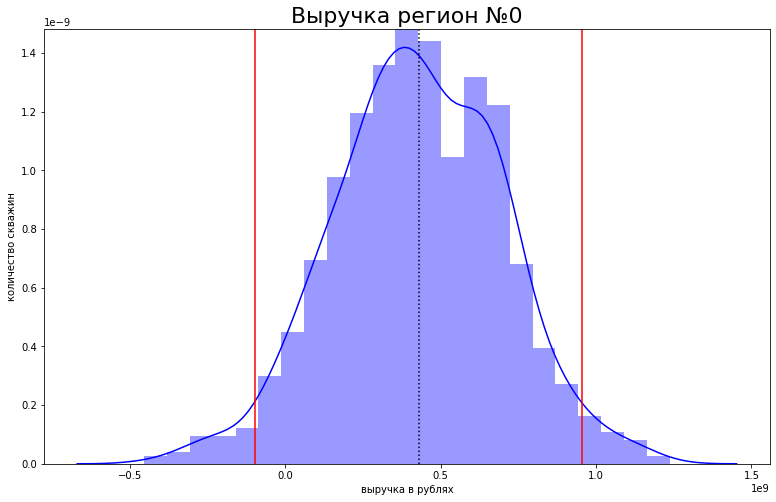

регион №1
Средняя выручка:511042558.36
95% доверительный интервал: 91700564.14 - 921455668.33
Риск убытков: 0.60%




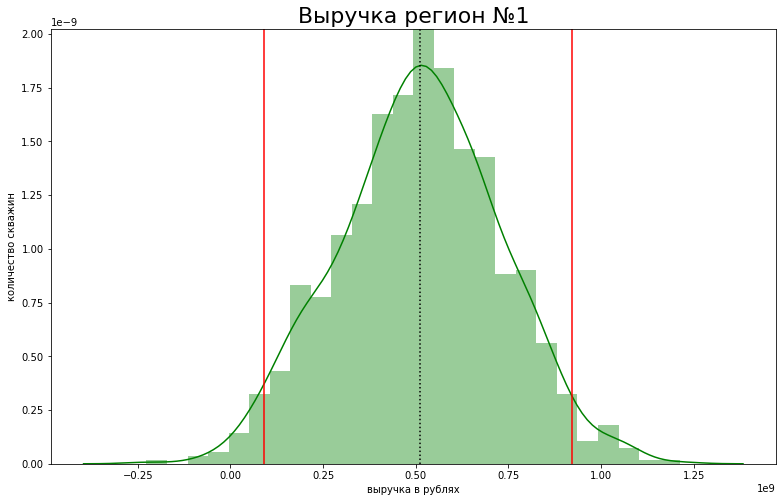

регион №2
Средняя выручка:407505043.48
95% доверительный интервал: -120624872.94 - 960859440.73
Риск убытков: 7.50%




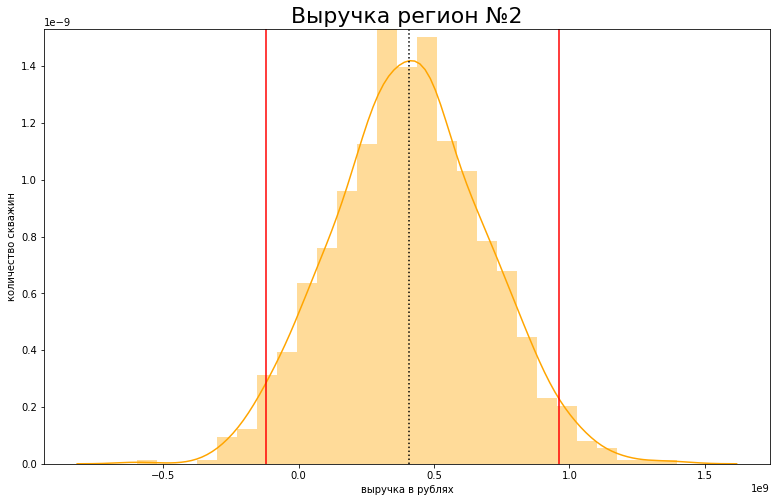

In [14]:
def revenue(target, probabilities, count): # Считаем прибыль
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:count]
    return selected.sum() * cost_thousand_barrel - total_budget

state = np.random.RandomState(42)
    

for i in trange(len(targets_test)):
    values = []
    counter = 0
    for _ in range(1000):
        target_subsample = targets_test[i].sample(n = 500, replace=True, random_state=state)
        probs_subsample = predictions[i][target_subsample.index] 
        reven = revenue(target_subsample, probs_subsample, total_wells)
        values.append(reven)
        if reven < 0:
            counter += 1
    name = 'регион №' + str(i)
    values = pd.Series(values)
    lower = values.quantile(risk)
    upper = values.quantile(0.975)
    mean =  values[(lower < values) & (values < upper)].mean()
    colors = ['blue', 'green', 'orange']
    print(name)
    print("Средняя выручка:{:.2f}".format(mean))
    print ('95% доверительный интервал: {:.2f} - {:.2f}'.format(lower, upper))
    print('Риск убытков: {:.2%}'.format(counter / 1000))
    print('\n')
    
    plt.figure(figsize=(13,8))
    sns.distplot(values, color=colors[i])
    plt.axvline(lower, color='r')
    plt.axvline(mean, color='black', linestyle=':')
    plt.axvline(upper, color='r')
    plt.title('Выручка ' + name, fontsize=22)
    plt.xlabel('выручка в рублях')
    plt.ylabel('количество скважин')


    plt.show()

### Вывод

Условиям заказчика отвечает только район под номером 1.
* риск убытков 0.6%
* средняя предполагаемая выручка составляет пол триллиона рублей
* в этом районе есть очень хороший признак, позволяющий нам строить эффективную модель предсказания 
  (RMSE = 0.89)

Данные с других регионов не позволили построить нам надежные модели. И по данным что у нас есть, мы можем предполагать что риски убытков в этих регионах выше чем допускает заказчик